# EDA: Admin Data + Doc-Topic Distribution

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#df=pd.read_csv('../../data/prd/RND Topic Modelling/abstracts_federal_reporter_combined.csv',engine='python')
df = pd.read_csv('/project/biocomplexity/sdad/projects_data/ncses/prd/RND Topic Modelling/FinalNSFTopicDataFrame.csv')


In [3]:
df.head()

,Unnamed: 0,index,PROJECT_ID,ABSTRACT,FY,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_TITLE,...,Topic_40,Topic_41,Topic_42,Topic_43,Topic_44,Topic_45,Topic_46,Topic_47,Topic_48,Topic_49
0,0,0,89996,"This is a project to explore Game-based, Metap...",2008,NSF,NSF,NaN,814512,RUI: CYGAMES: CYBER-ENABLED TEACHING AND LEARN...,...,0.000116,0.000116,0.692908,0.000116,0.000116,0.000116,0.000116,0.000116,0.000116,0.052179
1,1,1,89997,Institution: Franklin Institute Science Museum...,2008,NSF,NSF,NaN,741659,ARIEL - AUGMENTED REALITY FOR INTERPRETIVE AND...,...,0.000164,0.000164,0.532206,0.000164,0.000164,0.000164,0.000164,0.000164,0.000164,0.000164
2,2,2,89998,Through programs (including small group conver...,2008,NSF,NSF,NaN,813522,BRIGHTER FUTURES: PUBLIC DELIBERATION ABOUT TH...,...,0.000247,0.000247,0.171514,0.000247,0.000247,0.000247,0.000247,0.000247,0.000247,0.043000
3,3,3,89999,In partnership with the American Chemical Soci...,2008,NSF,NSF,NaN,838627,FOSTERING US-INTERNATIONAL COLLABORATIVE PARTN...,...,0.000364,0.271340,0.000364,0.000364,0.000364,0.000364,0.000364,0.000364,0.000364,0.000364
4,4,4,90000,Amphibian populations around the world are exp...,2008,NSF,NSF,NaN,815315,COLLABORATIVE RESEARCH: EVOLUTION OF AMPHIBIAN...,...,0.000208,0.000208,0.000208,0.000208,0.000208,0.000208,0.000208,0.000208,0.000208,0.000208


In [4]:
# just a check to make sure all of the data is NSF

df['DEPARTMENT'].value_counts()

NSF    116475
Name: DEPARTMENT, dtype: int64

In [5]:
df['AGENCY'].value_counts()

NSF    116475
Name: AGENCY, dtype: int64

In [6]:
df.columns

Index(['Unnamed: 0', 'index', 'PROJECT_ID', 'ABSTRACT', 'FY', 'DEPARTMENT',
       'AGENCY', 'IC_CENTER', 'PROJECT_NUMBER', 'PROJECT_TITLE',
       'PROJECT_TERMS', 'CONTACT_PI_PROJECT_LEADER', 'OTHER_PIS',
       'ORGANIZATION_NAME', 'CFDA_CODE', 'FY_TOTAL_COST', 'working_abstract',
       'tokened_abstracts', 'tokened_docs_nostop', 'tns_bi_tri_docs',
       'lemma_abstracts', 'Topic_0', 'Topic_1', 'Topic_2', 'Topic_3',
       'Topic_4', 'Topic_5', 'Topic_6', 'Topic_7', 'Topic_8', 'Topic_9',
       'Topic_10', 'Topic_11', 'Topic_12', 'Topic_13', 'Topic_14', 'Topic_15',
       'Topic_16', 'Topic_17', 'Topic_18', 'Topic_19', 'Topic_20', 'Topic_21',
       'Topic_22', 'Topic_23', 'Topic_24', 'Topic_25', 'Topic_26', 'Topic_27',
       'Topic_28', 'Topic_29', 'Topic_30', 'Topic_31', 'Topic_32', 'Topic_33',
       'Topic_34', 'Topic_35', 'Topic_36', 'Topic_37', 'Topic_38', 'Topic_39',
       'Topic_40', 'Topic_41', 'Topic_42', 'Topic_43', 'Topic_44', 'Topic_45',
       'Topic_46', 'Topic_47

# Find top abstracts for each topic

In [7]:
def top_n_docs_idx(df, topic, num_docs):

    # find the indices for the top n documents for topic "topic" 
    # input: topic - name of topic column
    
    temp = df[topic] 
    idx = temp.sort_values(ascending=False).index 
    
    return idx[:num_docs]

In [8]:
def top_n_docs(df, topic, num_docs):

    # prints out the top num_docs for the given topic

    idx = top_n_docs_idx(df, topic, num_docs)
    
    for i in idx:
        print(df['ABSTRACT'][i])
        print('========================\n')
    
    return
    

In [9]:
top_n_docs(df, "Topic_29", 5)

As many as 20 million Americans claim to be of Scottish or Scots/Irish descent. One of the primary heritage languages of this community is Scottish Gaelic. This language is the medium for a rich culture of literature, song, poetry, history and indigenous knowledge-systems. It also provides an important window into the world-view and culture of the ancestors of the Scottish-American community. Sadly, the Scottish Gaelic language is severely endangered. There are no monolingual speakers and, in Scotland, the number of speakers who use the language everyday has dropped more than a third in the past 30 years. At this rate, the language will no longer be viable within a generation. The potential loss to our understanding of the culture and background of so many Scots and Scottish Americans is of great concern. The Scottish Gaelic language is also of interest to linguists who study the structure of language. The sound system of Gaelic is very different from that of English. It has particular

# Visualize topic distribution by abstract

In [32]:
doc_topic_dist = df.loc[:, 'Topic_0':'Topic_49']

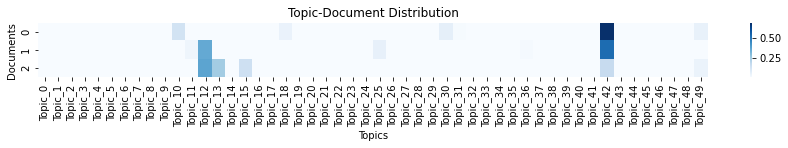

In [33]:
plt.figure(figsize=(15,1))
fig = sns.heatmap(doc_topic_dist[0:3], cmap="Blues") #yticklabels=False)
plt.xlabel("Topics")
plt.ylabel("Documents")
plt.title("Topic-Document Distribution")
plt.show(fig)

# Which topics appear the most?

In [12]:
# Find the average of each topic

avg = doc_topic_dist.mean(axis=0)
avg = avg.to_frame()
avg = avg.rename(columns={0:'average'})
avg = avg.transpose()

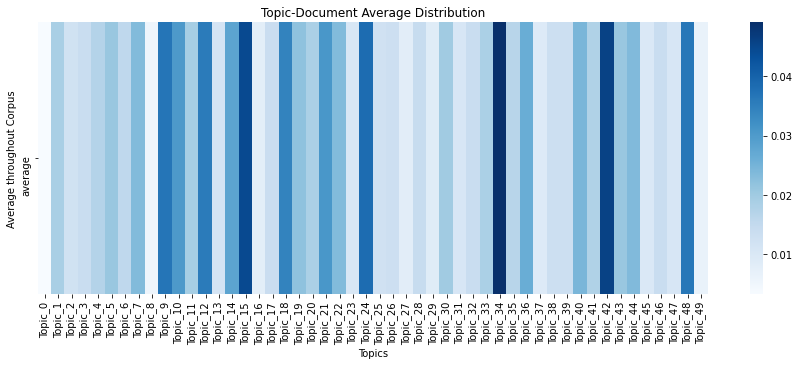

In [13]:
# plot averages

plt.figure(figsize=(15,5))
fig = sns.heatmap(avg, cmap="Blues") #yticklabels=False)
plt.xlabel("Topics")
plt.ylabel("Average throughout Corpus")
plt.title("Topic-Document Average Distribution")
plt.show(fig)

In [14]:
# as we would expect, the more general topics have the highest averages.  But overall the averages are low due 
# due to the number of abstracts in the corpus.

### Group By Year

In [15]:
# group the doc-topic-dist by year

doc_topic_dist['FY'] = df['FY']
by_year_df = doc_topic_dist.groupby('FY').mean()

In [16]:
by_year_df

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,...,Topic_40,Topic_41,Topic_42,Topic_43,Topic_44,Topic_45,Topic_46,Topic_47,Topic_48,Topic_49
FY,,,,,,,,,,,,,,,,,,,,,
2008,0.003205,0.012335,0.013562,0.014612,0.018814,0.022523,0.017542,0.025871,0.005733,0.037313,...,0.024760,0.018733,0.047284,0.020986,0.020701,0.010157,0.013124,0.009774,0.035201,0.005913
2009,0.002892,0.011835,0.014103,0.015296,0.020063,0.021304,0.017662,0.026977,0.005867,0.036301,...,0.023244,0.016624,0.038856,0.020505,0.020152,0.010709,0.017920,0.012385,0.035687,0.005719
2010,0.002779,0.015031,0.012874,0.013800,0.017145,0.021346,0.018820,0.022970,0.006414,0.037005,...,0.026963,0.018022,0.043425,0.018706,0.021698,0.009149,0.013366,0.010607,0.035322,0.004960
2011,0.003318,0.015049,0.013812,0.014757,0.017176,0.019945,0.016771,0.022982,0.006448,0.037210,...,0.029490,0.020227,0.045193,0.020281,0.022546,0.009515,0.013948,0.011359,0.032045,0.006294
2012,0.003461,0.017774,0.011744,0.014321,0.016358,0.021752,0.018216,0.020444,0.005514,0.035373,...,0.027577,0.018706,0.043442,0.022713,0.020237,0.009853,0.012753,0.011426,0.035801,0.005567
2013,0.003573,0.021501,0.012087,0.015176,0.015756,0.021648,0.016632,0.024053,0.005912,0.033747,...,0.024892,0.016942,0.049899,0.021715,0.024669,0.009367,0.012310,0.010815,0.037495,0.006215
2014,0.003361,0.020546,0.011464,0.014143,0.016908,0.021259,0.013665,0.022849,0.005687,0.038742,...,0.023826,0.016260,0.045593,0.021137,0.024422,0.010211,0.014013,0.010100,0.036067,0.008387
2015,0.003538,0.022318,0.011885,0.014712,0.017699,0.021598,0.012562,0.024281,0.004974,0.037772,...,0.023610,0.015869,0.046715,0.022791,0.027569,0.009914,0.013758,0.010361,0.036890,0.007956
2016,0.003429,0.025568,0.011439,0.014223,0.016904,0.022088,0.013597,0.023282,0.005244,0.036717,...,0.023382,0.018267,0.049207,0.020868,0.024997,0.011374,0.014136,0.011111,0.037979,0.007181


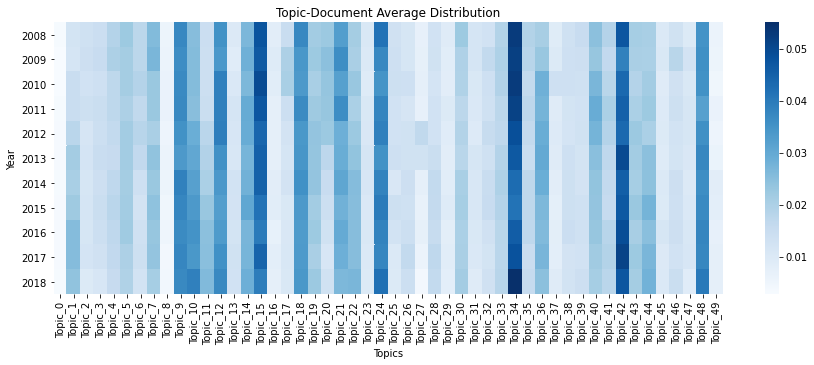

In [17]:
plt.figure(figsize=(15,5))
fig = sns.heatmap(by_year_df, cmap="Blues") #yticklabels=False)
plt.xlabel("Topics")
plt.ylabel("Year")
plt.title("Topic-Document Average Distribution")
plt.show(fig)

In [18]:
# Observations: 

# 1. Topics 1 and 11 are more popular as the years progress
# 2. Topic 20 is less popular as the years progress

## Identifying how many abstracts have a given percentage of Topic N

In [19]:
num_topics = 50
doc_topic_dist.columns[0:num_topics]

Index(['Topic_0', 'Topic_1', 'Topic_2', 'Topic_3', 'Topic_4', 'Topic_5',
       'Topic_6', 'Topic_7', 'Topic_8', 'Topic_9', 'Topic_10', 'Topic_11',
       'Topic_12', 'Topic_13', 'Topic_14', 'Topic_15', 'Topic_16', 'Topic_17',
       'Topic_18', 'Topic_19', 'Topic_20', 'Topic_21', 'Topic_22', 'Topic_23',
       'Topic_24', 'Topic_25', 'Topic_26', 'Topic_27', 'Topic_28', 'Topic_29',
       'Topic_30', 'Topic_31', 'Topic_32', 'Topic_33', 'Topic_34', 'Topic_35',
       'Topic_36', 'Topic_37', 'Topic_38', 'Topic_39', 'Topic_40', 'Topic_41',
       'Topic_42', 'Topic_43', 'Topic_44', 'Topic_45', 'Topic_46', 'Topic_47',
       'Topic_48', 'Topic_49'],
      dtype='object')

In [20]:
# could loop down by 0.5 and make a heatmap with percentage of abstracts that have this concentration of topic N

n = len(df)
concentration = np.around(np.linspace(0.05, 0.95, 19), decimals=2) # [0.05, 0.1, 0.15, ...]
concentration = concentration[::-1]  # [0.95, 0.9, 0.85, ..., 0.05]

c_mat = np.zeros((19,num_topics))

j = 0
for topic in doc_topic_dist.columns[0:num_topics]:
    
    # loop through each concentration for each topic

    i = 0
    for c in concentration:    
        c_mat[i,j] = (doc_topic_dist[topic] > c).sum()/n
        i = i+1
        
    j = j+1
    

In [21]:
c_df = pd.DataFrame(data=c_mat)
c_df.columns = doc_topic_dist.columns[0:num_topics]
c_df.index = concentration

In [22]:
c_df.head()

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,...,Topic_40,Topic_41,Topic_42,Topic_43,Topic_44,Topic_45,Topic_46,Topic_47,Topic_48,Topic_49
0.95,0.0,0.000009,0.000326,0.000000,0.000017,0.000009,0.000077,0.000283,0.000000,0.000429,...,0.000052,0.000155,0.001039,0.000077,0.000009,0.000000,0.000309,0.000120,0.000919,0.000000
0.90,0.0,0.000026,0.000850,0.000009,0.000103,0.000052,0.000292,0.000781,0.000000,0.001417,...,0.000112,0.000223,0.002490,0.000343,0.000060,0.000000,0.000901,0.000438,0.002121,0.000000
0.85,0.0,0.000086,0.001614,0.000017,0.000258,0.000197,0.000816,0.001468,0.000017,0.002713,...,0.000189,0.000352,0.004619,0.000747,0.000137,0.000000,0.001897,0.000936,0.003803,0.000000
0.80,0.0,0.000206,0.002842,0.000060,0.000532,0.000446,0.001219,0.002507,0.000094,0.004593,...,0.000352,0.000610,0.007083,0.001460,0.000300,0.000009,0.003357,0.001674,0.005503,0.000009
0.75,0.0,0.000386,0.004121,0.000249,0.000970,0.000884,0.001777,0.003769,0.000129,0.006860,...,0.000687,0.000919,0.009873,0.002172,0.000575,0.000043,0.004945,0.002653,0.007624,0.000009


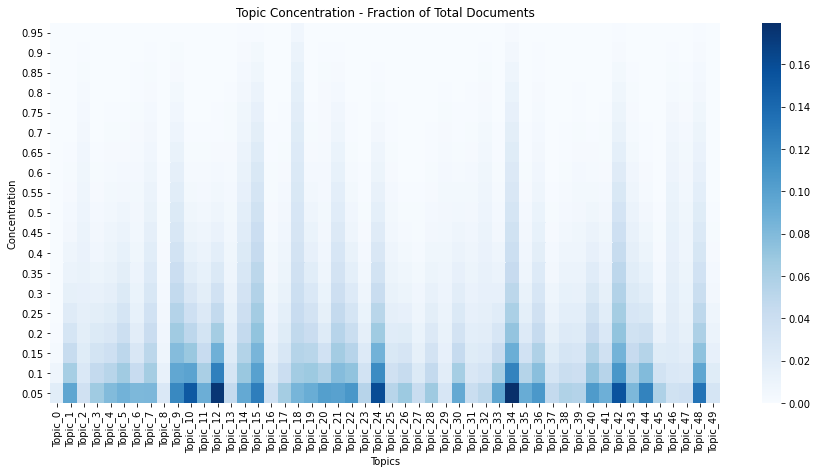

In [23]:
plt.figure(figsize=(15,7))
fig = sns.heatmap(c_df, cmap="Blues") #yticklabels=False)
plt.xlabel("Topics")
plt.ylabel("Concentration")
plt.yticks(rotation=0)
plt.title("Topic Concentration - Fraction of Total Documents")
plt.show(fig)

# Find dominant topic in each abstract

In [27]:
df.head()

,Unnamed: 0,index,PROJECT_ID,ABSTRACT,FY,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_TITLE,...,Topic_40,Topic_41,Topic_42,Topic_43,Topic_44,Topic_45,Topic_46,Topic_47,Topic_48,Topic_49
0,0,0,89996,"This is a project to explore Game-based, Metap...",2008,NSF,NSF,NaN,814512,RUI: CYGAMES: CYBER-ENABLED TEACHING AND LEARN...,...,0.000116,0.000116,0.692908,0.000116,0.000116,0.000116,0.000116,0.000116,0.000116,0.052179
1,1,1,89997,Institution: Franklin Institute Science Museum...,2008,NSF,NSF,NaN,741659,ARIEL - AUGMENTED REALITY FOR INTERPRETIVE AND...,...,0.000164,0.000164,0.532206,0.000164,0.000164,0.000164,0.000164,0.000164,0.000164,0.000164
2,2,2,89998,Through programs (including small group conver...,2008,NSF,NSF,NaN,813522,BRIGHTER FUTURES: PUBLIC DELIBERATION ABOUT TH...,...,0.000247,0.000247,0.171514,0.000247,0.000247,0.000247,0.000247,0.000247,0.000247,0.043000
3,3,3,89999,In partnership with the American Chemical Soci...,2008,NSF,NSF,NaN,838627,FOSTERING US-INTERNATIONAL COLLABORATIVE PARTN...,...,0.000364,0.271340,0.000364,0.000364,0.000364,0.000364,0.000364,0.000364,0.000364,0.000364
4,4,4,90000,Amphibian populations around the world are exp...,2008,NSF,NSF,NaN,815315,COLLABORATIVE RESEARCH: EVOLUTION OF AMPHIBIAN...,...,0.000208,0.000208,0.000208,0.000208,0.000208,0.000208,0.000208,0.000208,0.000208,0.000208


In [46]:
dom_top_idx = df.loc[:, 'Topic_0':'Topic_49'].idxmax(axis=1)
dom_top_frac = df.loc[:, 'Topic_0':'Topic_49'].max(axis=1)

In [47]:
type(dom_top_idx.value_counts())
dom_top_idx.shape

(116475,)

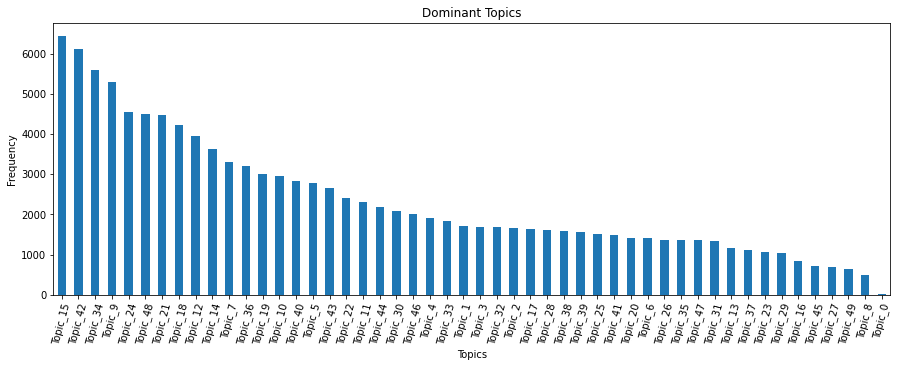

In [48]:
plt.figure(figsize=(15,5))
(dom_top_idx.value_counts()).plot.bar()
plt.xlabel("Topics")
plt.xticks(rotation=75)
plt.ylabel("Frequency")
plt.title("Dominant Topics")
plt.show(fig)



In [45]:
df['Dominant_Topic'] = dom_top_idx

In [50]:
df['Dominant_Topic_Fraction'] = dom_top_frac

In [51]:
df.head()

,Unnamed: 0,index,PROJECT_ID,ABSTRACT,FY,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_TITLE,...,Topic_42,Topic_43,Topic_44,Topic_45,Topic_46,Topic_47,Topic_48,Topic_49,Dominant_Topic,Dominant_Topic_Fraction
0,0,0,89996,"This is a project to explore Game-based, Metap...",2008,NSF,NSF,NaN,814512,RUI: CYGAMES: CYBER-ENABLED TEACHING AND LEARN...,...,0.692908,0.000116,0.000116,0.000116,0.000116,0.000116,0.000116,0.052179,Topic_42,0.692908
1,1,1,89997,Institution: Franklin Institute Science Museum...,2008,NSF,NSF,NaN,741659,ARIEL - AUGMENTED REALITY FOR INTERPRETIVE AND...,...,0.532206,0.000164,0.000164,0.000164,0.000164,0.000164,0.000164,0.000164,Topic_42,0.532206
2,2,2,89998,Through programs (including small group conver...,2008,NSF,NSF,NaN,813522,BRIGHTER FUTURES: PUBLIC DELIBERATION ABOUT TH...,...,0.171514,0.000247,0.000247,0.000247,0.000247,0.000247,0.000247,0.043000,Topic_12,0.377431
3,3,3,89999,In partnership with the American Chemical Soci...,2008,NSF,NSF,NaN,838627,FOSTERING US-INTERNATIONAL COLLABORATIVE PARTN...,...,0.000364,0.000364,0.000364,0.000364,0.000364,0.000364,0.000364,0.000364,Topic_20,0.333792
4,4,4,90000,Amphibian populations around the world are exp...,2008,NSF,NSF,NaN,815315,COLLABORATIVE RESEARCH: EVOLUTION OF AMPHIBIAN...,...,0.000208,0.000208,0.000208,0.000208,0.000208,0.000208,0.000208,0.000208,Topic_39,0.319764
